# Handwritten Digits Recognition Models: Tutorial

*This notebook contains (edited/augmented) code from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas.*

### Import libraries

In [1]:
# image data
from sklearn.datasets import load_digits

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Load and visualize data

In [3]:
# load data
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [4]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
digits.target[10]

0

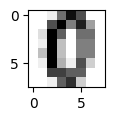

In [16]:
plt.figure(figsize=(1,1))
plt.imshow(digits.images[10], cmap='binary')

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12), subplot_kw={'xticks':[], 'yticks':[]})



### Digits Classification Model

In [17]:
# grab all data (1,797 records, and 8x8=64 columns)
X = digits.data

# grab the target (true) value for each image
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=314)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1347, 64) (1347,) (450, 64) (450,)


In [18]:
# define the model object
clf = RandomForestClassifier(random_state=314, max_depth=4, n_estimators=10)

# fit (train) the model
clf.fit(X_train, y_train)

# make predictions on the test data
y_preds = clf.predict(X_test)

In [19]:
# accuracy score
accuracy_score(y_preds, y_test)

0.8711111111111111

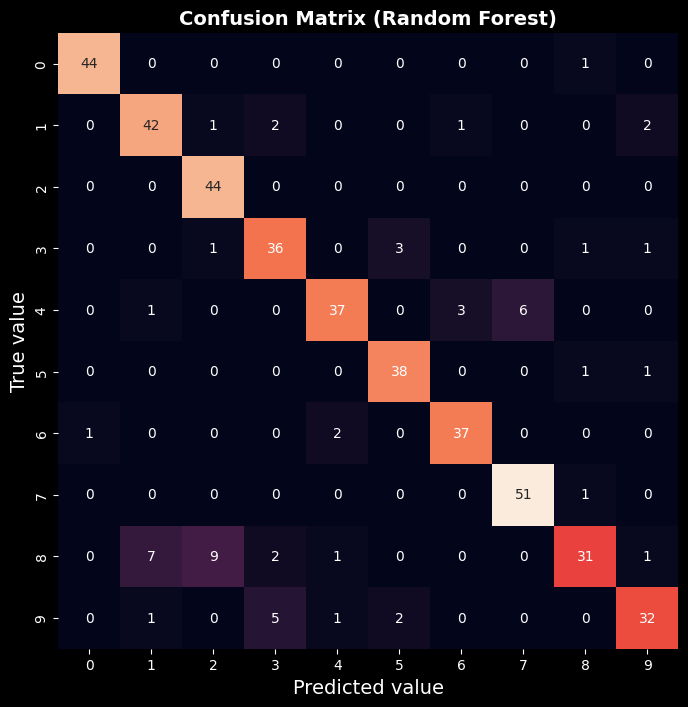

In [24]:
# confusion matrix
cfm = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(8, 8))

sns.heatmap(cfm, annot=True, cbar=False)
plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('True value', fontsize=14)
plt.title('Confusion Matrix (Random Forest)', fontsize=14, weight='semibold');

### View predictions

In [25]:
y_preds_all = clf.predict(X)

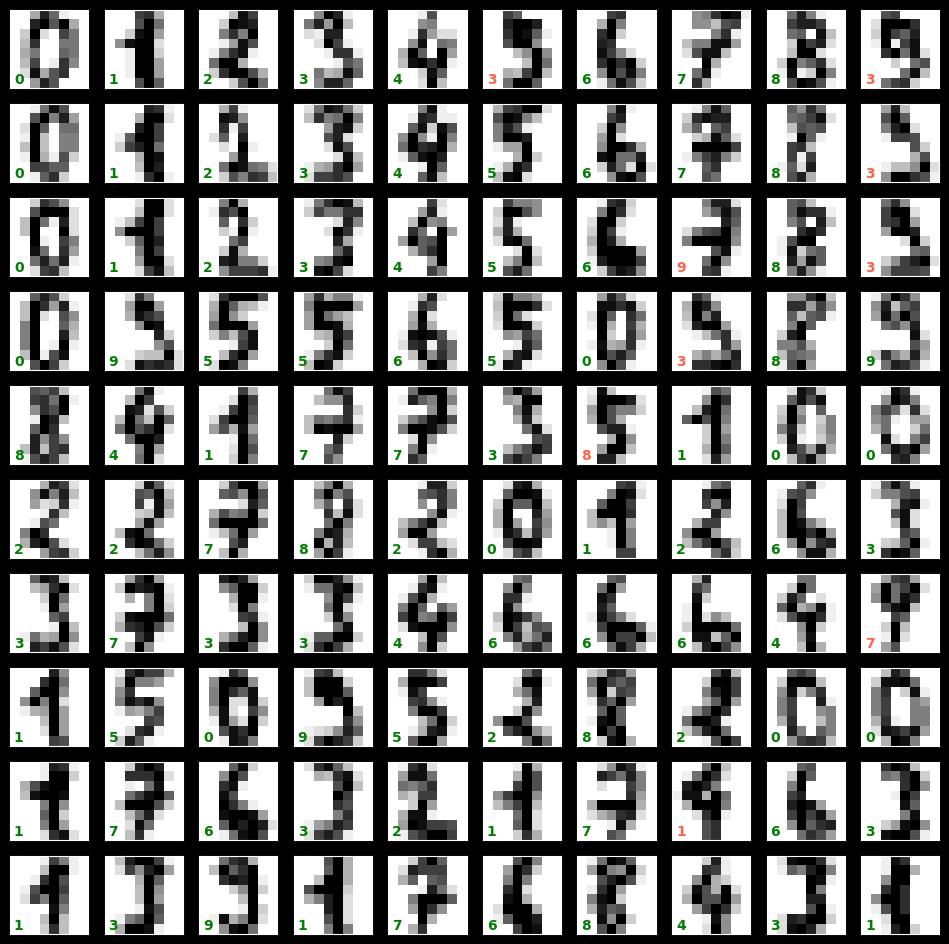

In [26]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    if y_preds_all[i] == digits.target[i]:
        ax.text(0.05, 0.05, str(y_preds_all[i]), color='green', 
                weight='semibold', transform=ax.transAxes)
    else:
        ax.text(0.05, 0.05, str(y_preds_all[i]), color='tomato', 
                weight='semibold', transform=ax.transAxes)